# Big Mart Sales

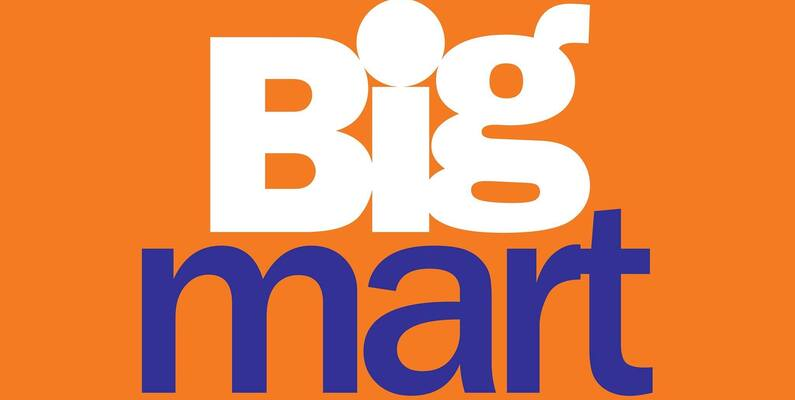

### About Dataset

2013 sales data for 1559 Big Mart products across 10 stores in different cities were collected. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

The dataset provides the product details and the outlet information of the products purchased with their sales value split into a train set (8523) and a test (5681) set.
Train file: CSV containing the item outlet information with sales value
Test file: CSV containing item outlet combinations for which sales need to be forecasted


### Variable Description
- ProductID : unique product ID
- Weight : weight of products
- FatContent : specifies whether the product is low on fat or not
- Visibility : percentage of total display area of all products in a store allocated to the particular product
- ProductType : the category to which the product belongs
- MRP : Maximum Retail Price (listed price) of the products
- OutletID : unique store ID
- EstablishmentYear : year of establishment of the outlets
- OutletSize : the size of the store in terms of ground area covered
- LocationType : the type of city in which the store is located
- OutletType : specifies whether the outlet is just a grocery store or some sort of supermarket
- OutletSales : (target variable) sales of the product in the particular store

### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading and understaning the data

In [2]:
df = pd.read_csv('Train-Set.csv')
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Understanding the dataset
def data_understanding(data):
    # Checking the shape of the dataset
    print('Shape of the dataset: \n', df.shape, '\n')

    # Checking for null values in the dataset
    print('missing values in the dataset: \n', df.isnull().sum(), '\n')

    # Checking for the information of the dataset
    print('Information about the dataset: \n')
    display(df.info())

    # Checking for the description of the dataset
    print('Statistical description of the dataset: \n', df.describe(include=['int', 'float']), '\n')
    print('Categorical description of the dataset: \n', df.describe(include='object'), '\n')

    # Checking for duplicates in the dataset
    print('Duplicates in the datset: \n', df.duplicated().sum(), '\n')

In [4]:
data_understanding(df)

Shape of the dataset: 
 (8523, 12) 

missing values in the dataset: 
 ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64 

Information about the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 no

None

Statistical description of the dataset: 
             Weight  ProductVisibility          MRP  EstablishmentYear  \
count  7060.000000        8523.000000  8523.000000        8523.000000   
mean     12.857645           0.066132   140.992782        1997.831867   
std       4.643456           0.051598    62.275067           8.371760   
min       4.555000           0.000000    31.290000        1985.000000   
25%       8.773750           0.026989    93.826500        1987.000000   
50%      12.600000           0.053931   143.012800        1999.000000   
75%      16.850000           0.094585   185.643700        2004.000000   
max      21.350000           0.328391   266.888400        2009.000000   

        OutletSales  
count   8523.000000  
mean    2181.288914  
std     1706.499616  
min       33.290000  
25%      834.247400  
50%     1794.331000  
75%     3101.296400  
max    13086.964800   

Categorical description of the dataset: 
        ProductID FatContent            ProductType OutletI

### Data Cleaning

In [5]:
df.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [6]:
columns_to_clean = ['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales']

In [7]:
def cleaning_data(data, columns):
    for col in columns:
        if col not in data.columns:
            continue
        
        # Replacing error values
        data[col] = data[col].replace(['?', 'nan', 'NaN'], np.nan)

        # Missing values
        if data[col].isnull().sum() > 0:
            if pd.api.types.is_numeric_dtype(data[col]):
                data[col] = data[col].astype(float)
                data[col] = data[col].fillna(data[col].mean())
            else:
                data[col] = data[col].fillna(data[col].mode()[0])
            
        # Duplicates
        if data.duplicated().sum() > 0:
            data = data.drop_duplicates()

    return data

df_copy = cleaning_data(df.copy(), columns_to_clean)
df_copy.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
# Save the file as cleaned data
df_copy.to_csv('big_mart_cleaned.csv', index=False)

In [9]:
df_copy.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [10]:
# Drop the product Id column
df_copy = df_copy.drop('ProductID', axis=1)

### Exploratory data Analysis

Top 10 ProductTypes by OutletSales:
ProductType
Fruits and Vegetables    2.820060e+06
Snack Foods              2.732786e+06
Household                2.055494e+06
Frozen Foods             1.825735e+06
Dairy                    1.522594e+06
Canned                   1.444151e+06
Baking Goods             1.265525e+06
Health and Hygiene       1.045200e+06
Meat                     9.175656e+05
Soft Drinks              8.928977e+05
Name: OutletSales, dtype: float64


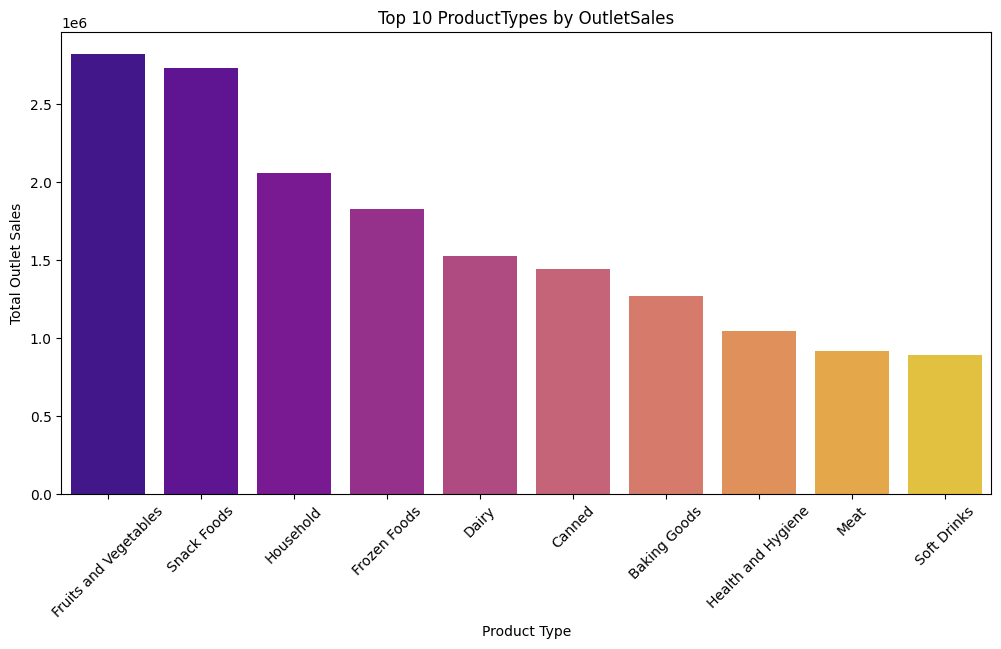

In [11]:
# Checking the top ProductType by OutletSales
def top_products_by_sales(data):
    top_products = data.groupby('ProductType')['OutletSales'].sum().sort_values(ascending=False).head(10)
    return top_products
top_products = top_products_by_sales(df_copy)
print("Top 10 ProductTypes by OutletSales:")
print(top_products)
# Visualizing the top ProductType by OutletSales
def plot_top_products_by_sales(data):
    top_products = top_products_by_sales(data)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_products.index, y=top_products.values, palette='plasma')
    plt.title('Top 10 ProductTypes by OutletSales')
    plt.xlabel('Product Type')
    plt.ylabel('Total Outlet Sales')
    plt.xticks(rotation=45)
    plt.show()
plot_top_products_by_sales(df_copy)

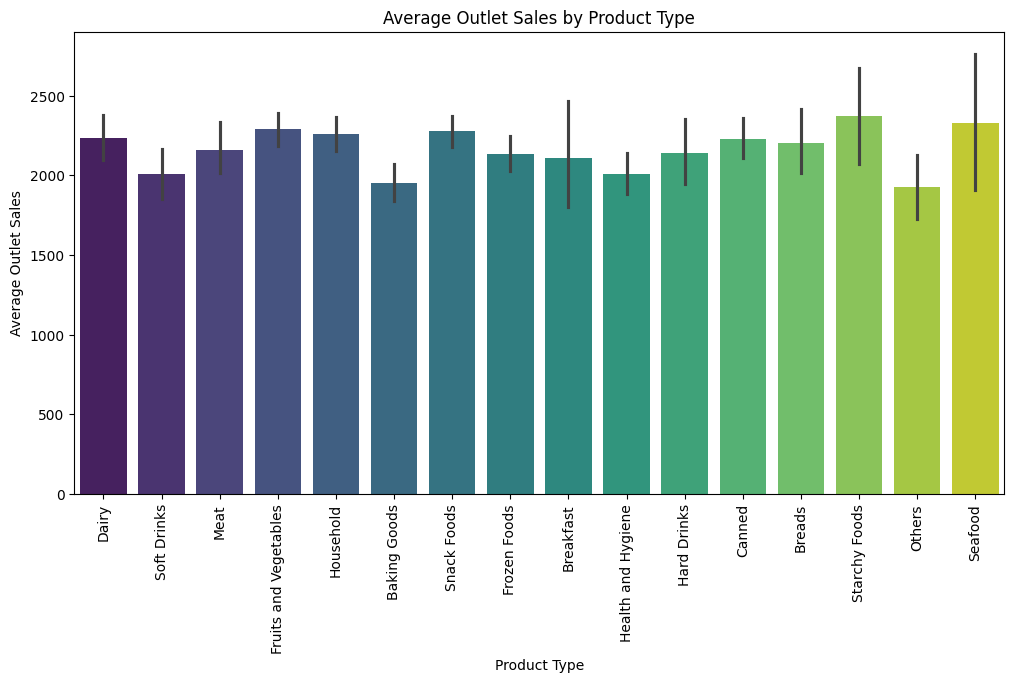

In [12]:
# Checking ProductType by OutletSales
def plot_product_sales(data):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='ProductType', y='OutletSales', data=data, palette='viridis')
    plt.title('Average Outlet Sales by Product Type')
    plt.xticks(rotation=90)
    plt.xlabel('Product Type')
    plt.ylabel('Average Outlet Sales')
    plt.show()
plot_product_sales(df_copy)

Top 10 OutletSales by OutletType:
OutletType
Supermarket Type1    1.291734e+07
Supermarket Type3    3.453926e+06
Supermarket Type2    1.851823e+06
Grocery Store        3.680343e+05
Name: OutletSales, dtype: float64


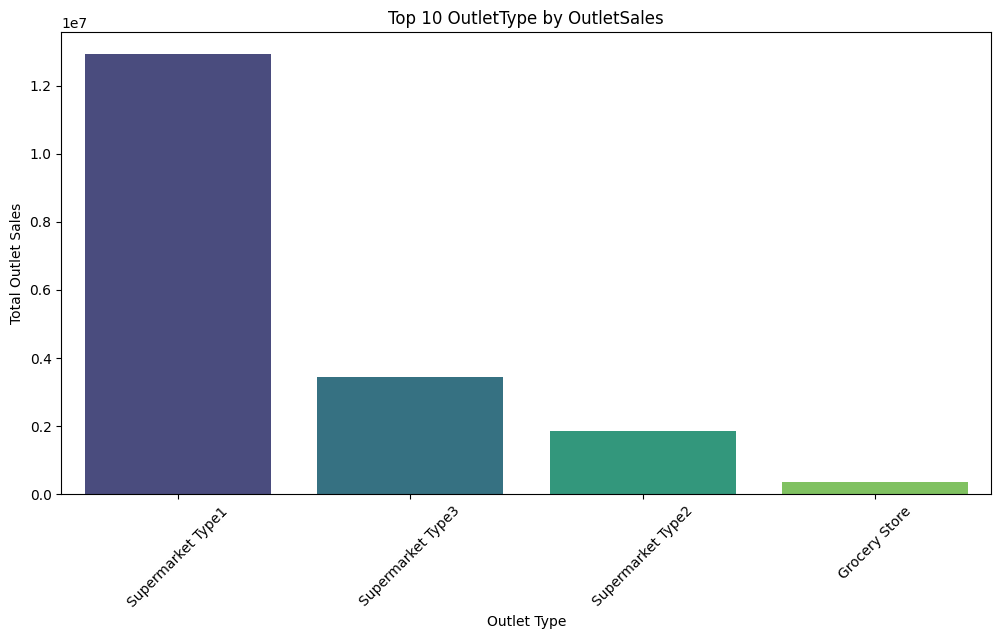

In [13]:
# Checking the top OutletType by OutletSales
def top_outlet_sales(data):
    top_sales = data.groupby('OutletType')['OutletSales'].sum().sort_values(ascending=False).head(10)
    return top_sales
top_products = top_products_by_sales(df_copy)
print("Top 10 OutletSales by OutletType:")
print(top_outlet_sales(df_copy))
# Visualizing the top OutletSales by OutletType
def plot_top_outlet_sales(data):
    top_sales = top_outlet_sales(data)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_sales.index, y=top_sales.values, palette='viridis')
    plt.title('Top 10 OutletType by OutletSales')
    plt.xlabel('Outlet Type')
    plt.ylabel('Total Outlet Sales')
    plt.xticks(rotation=45)
    plt.show()
plot_top_outlet_sales(df_copy)

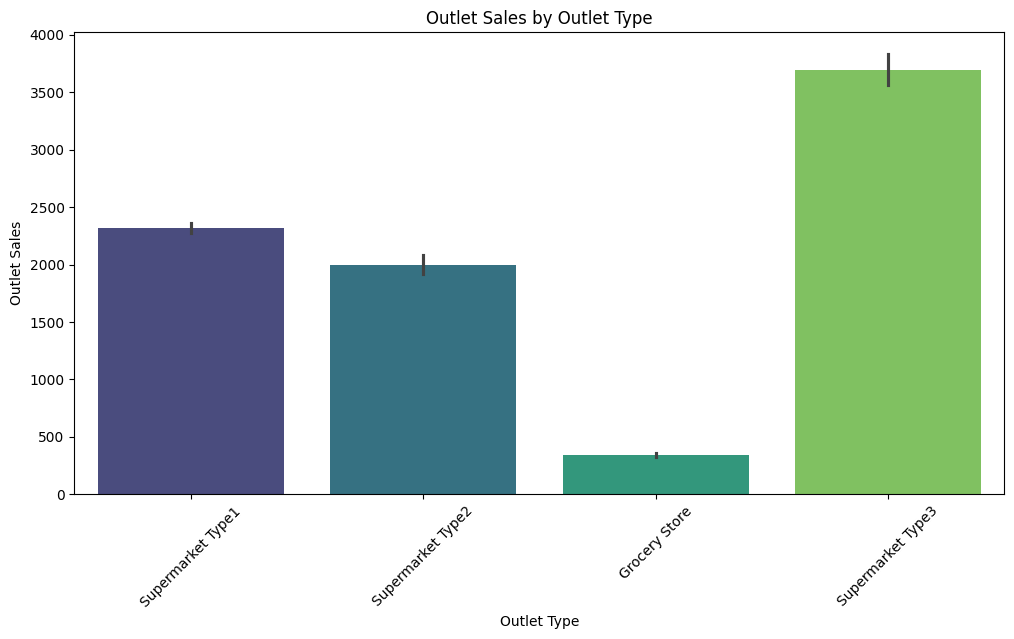

In [14]:
# Checking OutLetType by OutletSales
def plot_outlet_sales_by_type(data):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='OutletType', y='OutletSales', data=data, palette='viridis')
    plt.title('Outlet Sales by Outlet Type')
    plt.xlabel('Outlet Type')
    plt.ylabel('Outlet Sales')
    plt.xticks(rotation=45)
    plt.show()

plot_outlet_sales_by_type(df_copy)

Top FatContent by OutletSales:
FatContent
Low Fat    1.101503e+07
Regular    6.457454e+06
LF         6.552424e+05
low fat    2.338270e+05
reg        2.295765e+05
Name: OutletSales, dtype: float64


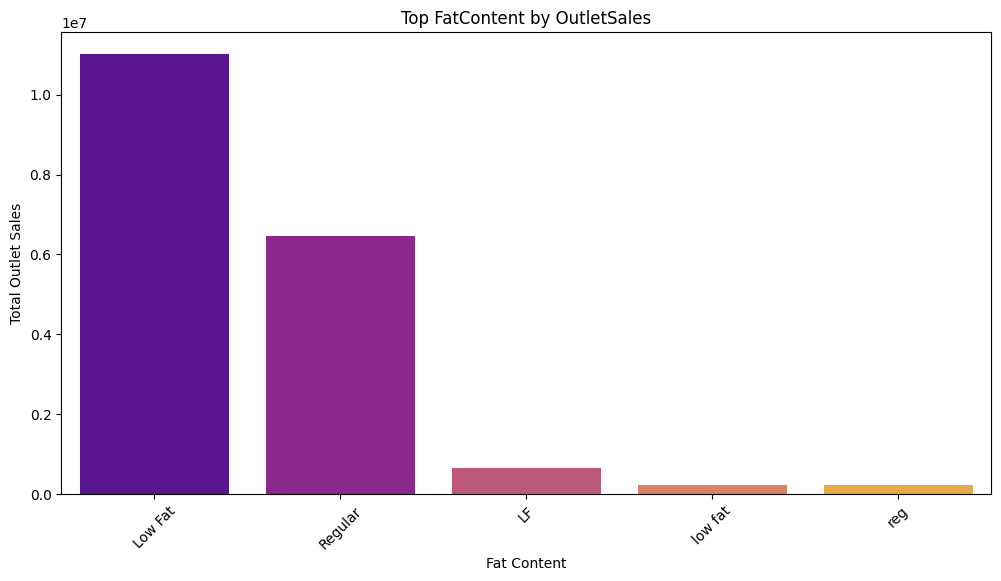

In [15]:
# Checking top FatContent by OutletSales
def top_fat_content_sales(data):
    top_fat_content = data.groupby('FatContent')['OutletSales'].sum().sort_values(ascending=False).head(10)
    return top_fat_content
top_fat_content = top_fat_content_sales(df_copy)
print("Top FatContent by OutletSales:")
print(top_fat_content)
# Visualizing the top FatContent by OutletSales
def plot_top_fat_content_sales(data):
    top_fat_content = top_fat_content_sales(data)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_fat_content.index, y=top_fat_content.values, palette='plasma')
    plt.title('Top FatContent by OutletSales')
    plt.xlabel('Fat Content')
    plt.ylabel('Total Outlet Sales')
    plt.xticks(rotation=45)
    plt.show()
plot_top_fat_content_sales(df_copy)

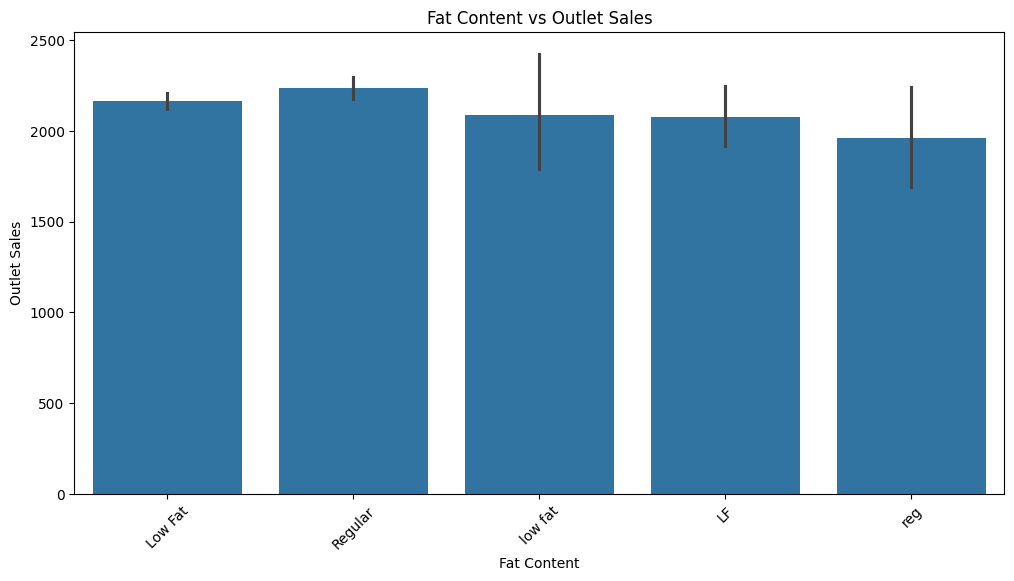

In [16]:
# Checking FatContent by OutletSales
def plot_fat_content_vs_sales(data):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='FatContent', y='OutletSales', data=data)
    plt.title('Fat Content vs Outlet Sales')
    plt.xlabel('Fat Content')
    plt.ylabel('Outlet Sales')
    plt.xticks(rotation=45)
    plt.show()
plot_fat_content_vs_sales(df_copy)

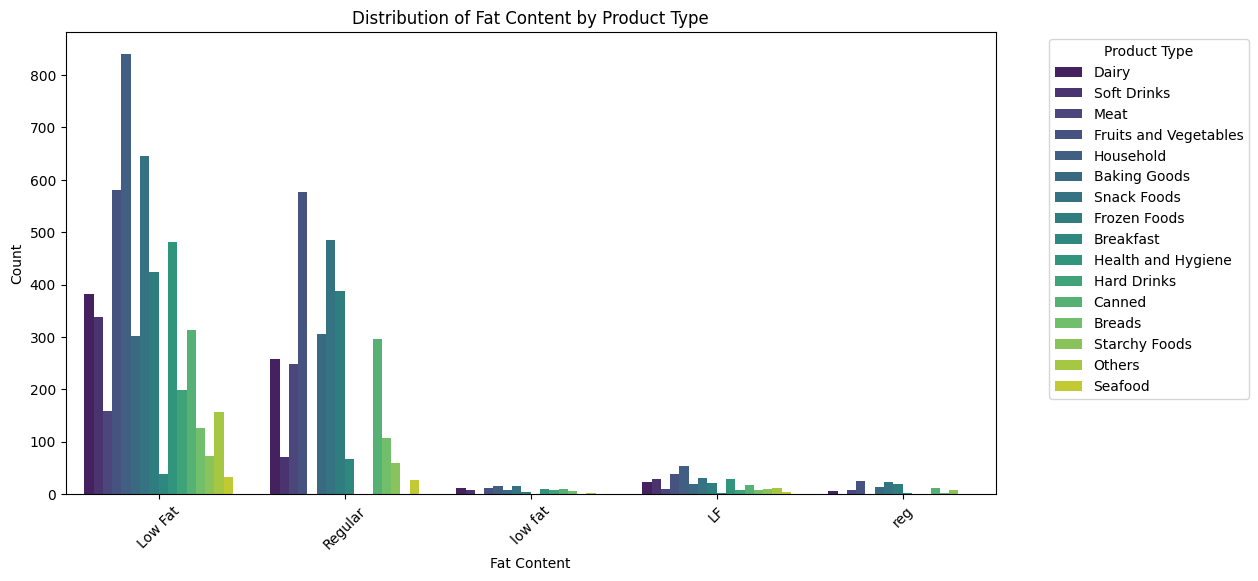

In [17]:
# Checking the distribution of FatContent by ProductType
def plot_fat_content_distribution(data):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='FatContent', hue='ProductType', data=data, palette='viridis')
    plt.title('Distribution of Fat Content by Product Type')
    plt.xlabel('Fat Content')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
plot_fat_content_distribution(df_copy)

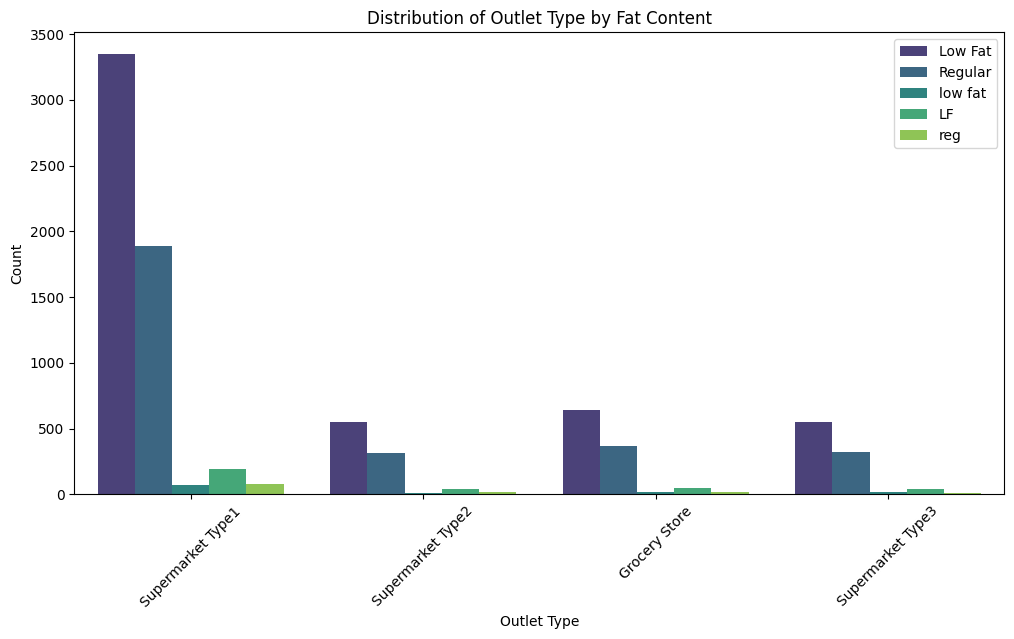

In [18]:
# Checking the distribution of OutletType by FatContent
def plot_outlet_type_fat_content(data):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='OutletType', hue='FatContent', data=data, palette='viridis')
    plt.title('Distribution of Outlet Type by Fat Content')
    plt.xlabel('Outlet Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
plot_outlet_type_fat_content(df_copy)

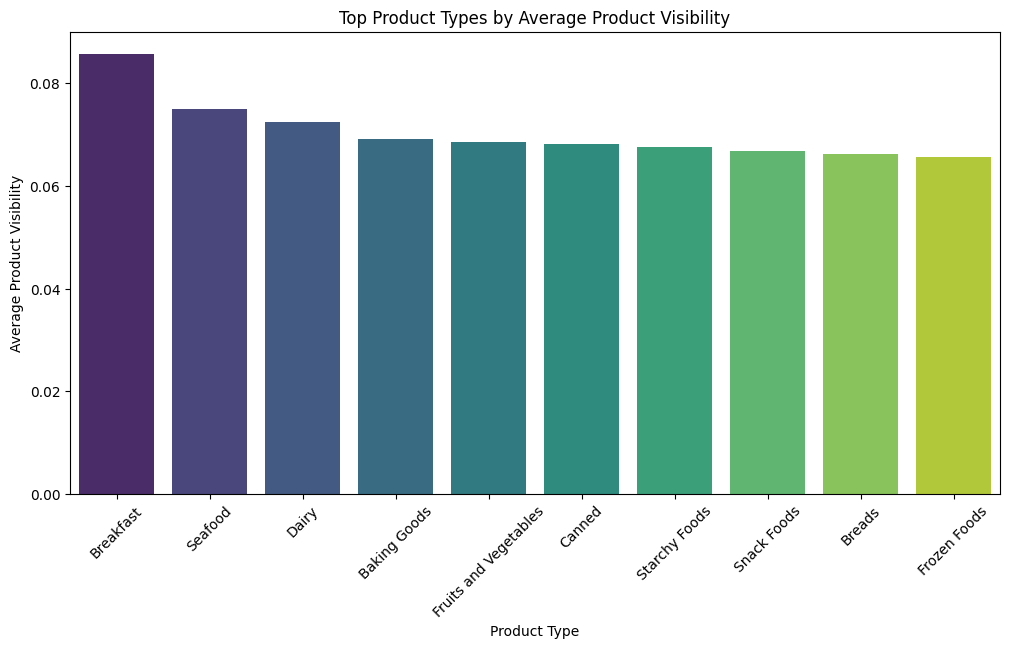

In [19]:
# Top ProdcutType with highest ProductVisibility
def top_product_visibility(data):
    top_product = data.groupby('ProductType')['ProductVisibility'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_product.index, y=top_product.values, palette='viridis')
    plt.title('Top Product Types by Average Product Visibility')
    plt.xlabel('Product Type')
    plt.ylabel('Average Product Visibility')
    plt.xticks(rotation=45)
    plt.show()
top_product_visibility(df_copy)

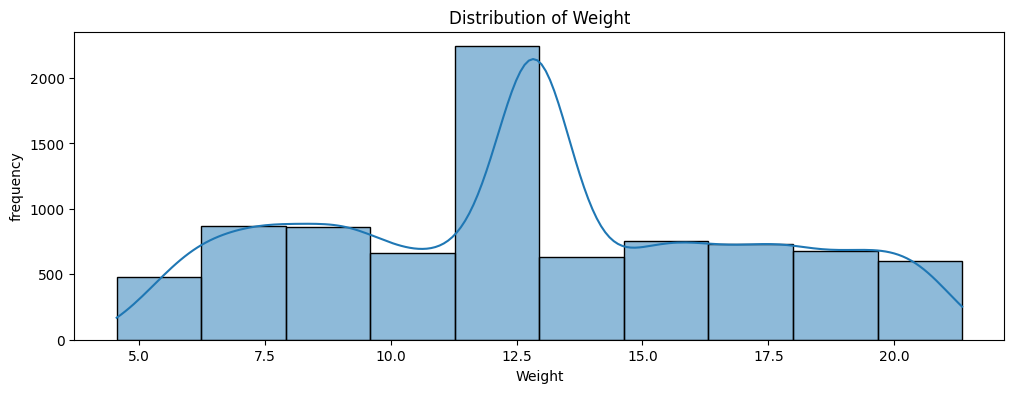

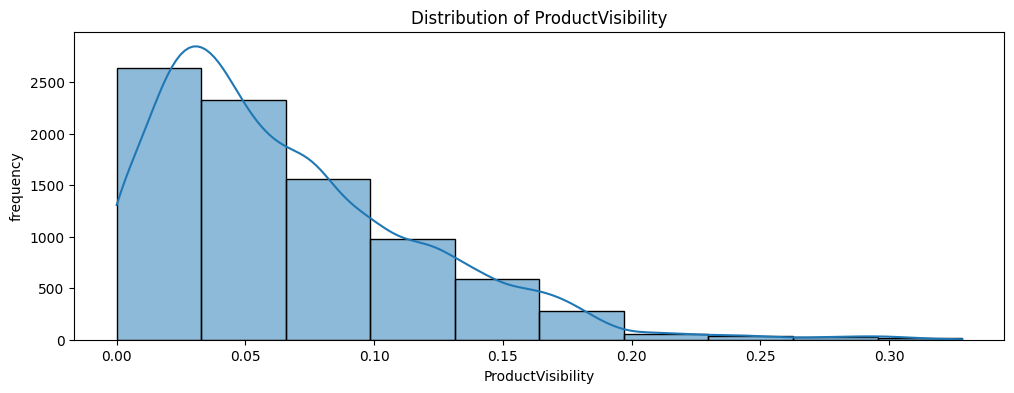

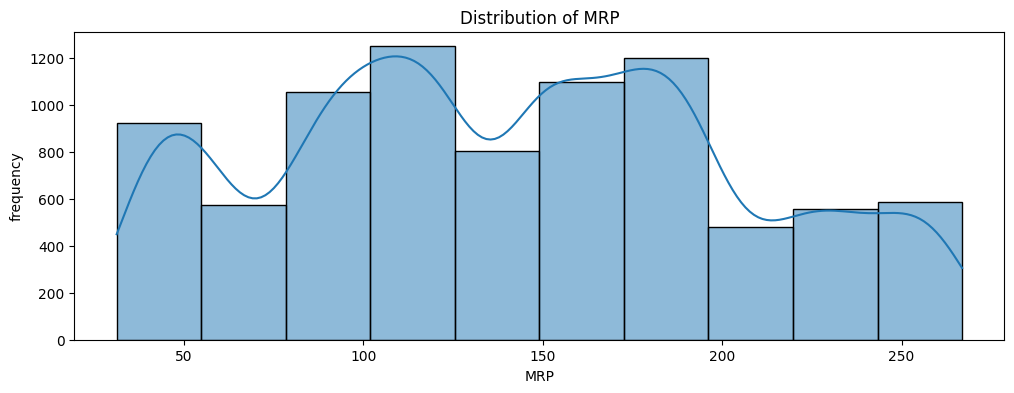

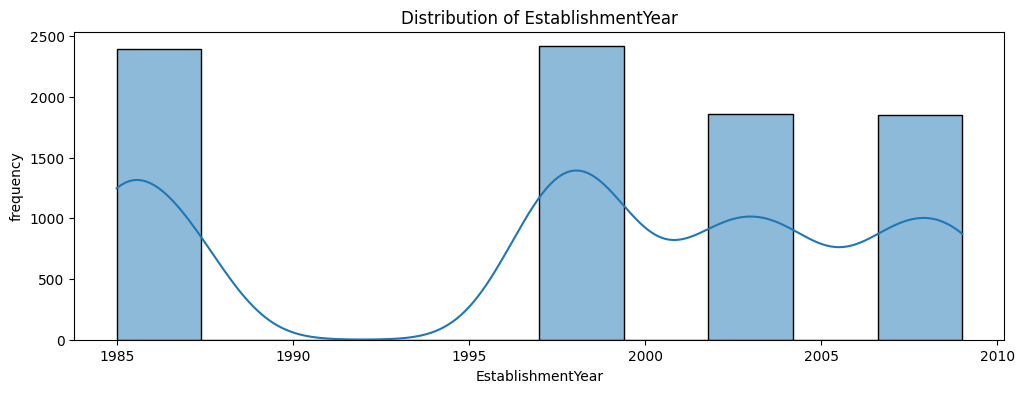

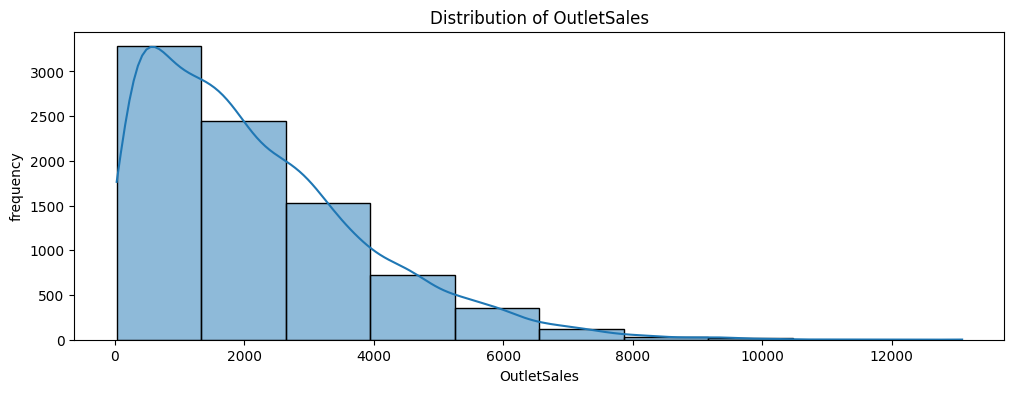

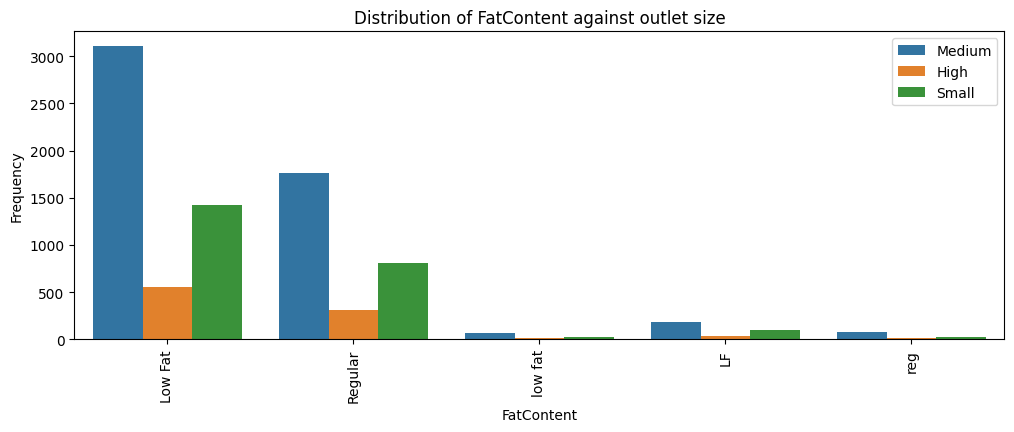

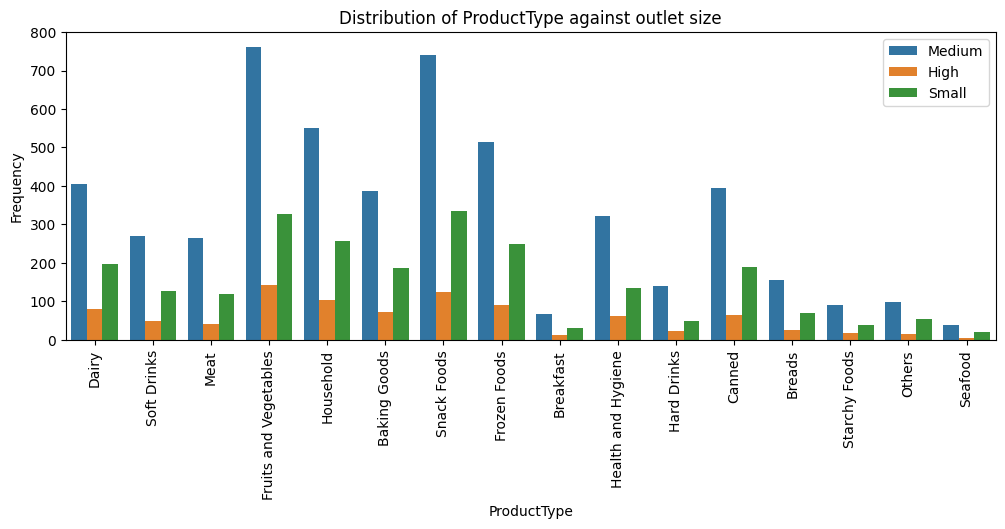

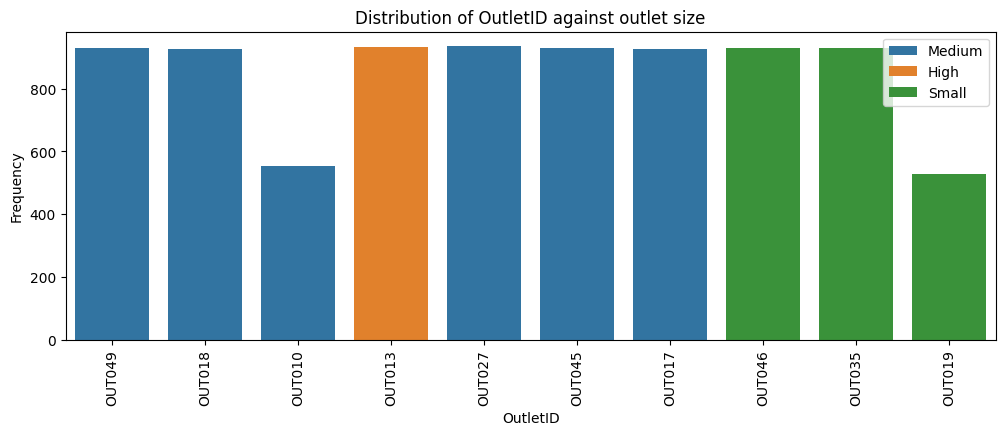

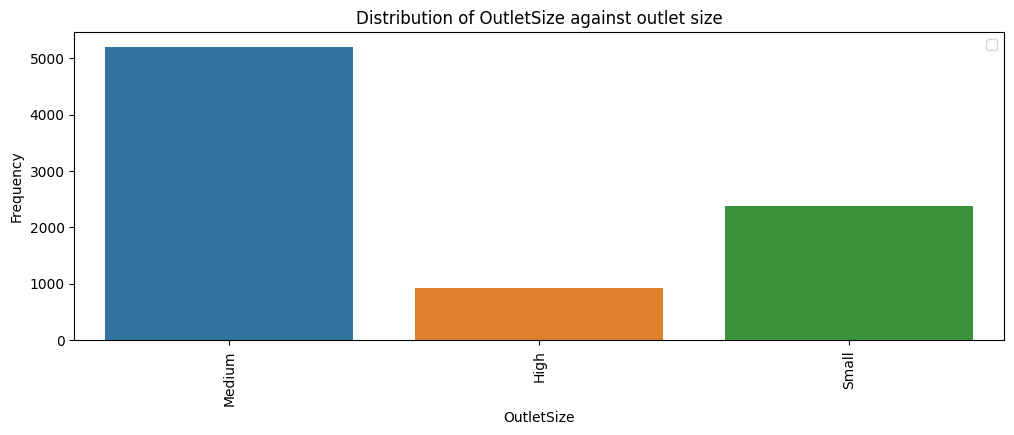

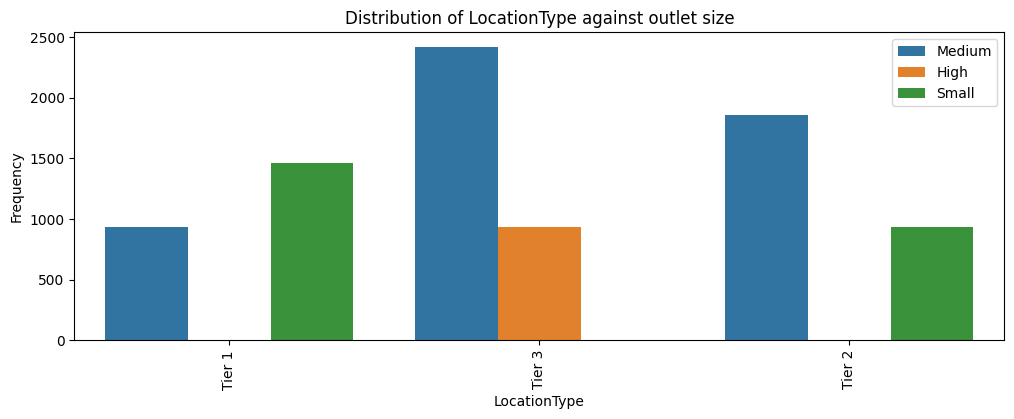

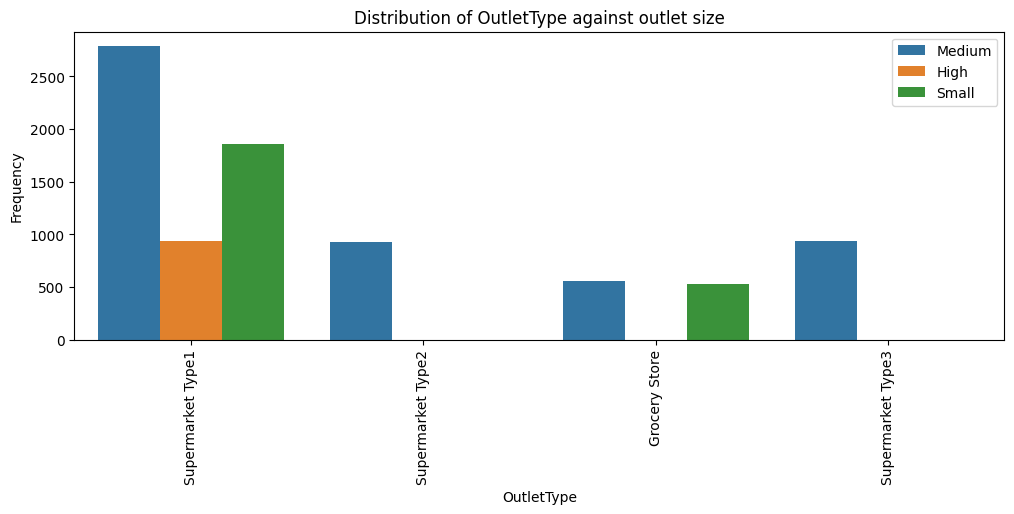

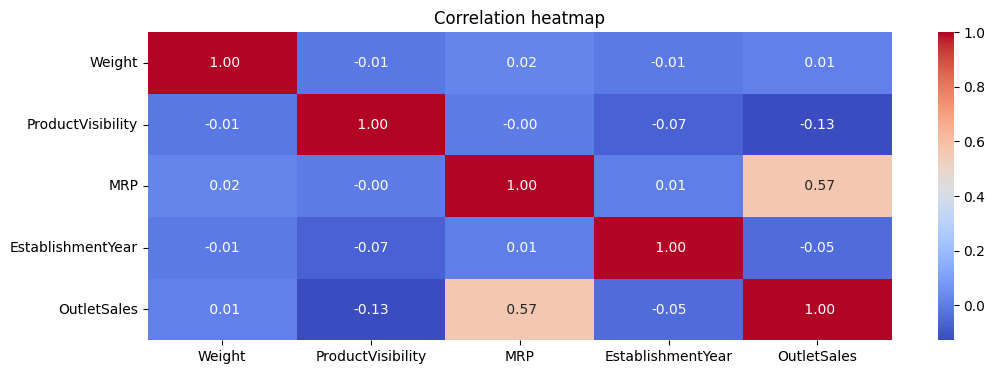

In [20]:
def data_exploration(df):
    # Visualizing the distribution of the numerical columns in the dataset
    for i in df.select_dtypes(include=['int', 'float']):
        plt.figure(figsize=(12, 4))
        sns.histplot(data=df, x=i, bins=10, kde=True)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
        plt.ylabel('frequency')
        plt.show()

    # Visualizing the distribution of the categorical columns in the dataset
    for i in df.select_dtypes(include='object'):
        plt.figure(figsize=(12, 4))
        sns.countplot(data=df, x=i, hue='OutletSize')
        plt.title(f'Distribution of {i} against outlet size')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(12, 4))
    numerical_cols = df.select_dtypes(include=['int', 'float'])
    sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=' .2f')
    plt.title('Correlation heatmap')
    plt.show()
    
data_exploration(df_copy)

### Data Preprocessing

In [21]:
df.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [23]:
def data_preprocessing(df, label_encoders=None, scaler=None, is_train=True):
    from sklearn.preprocessing import LabelEncoder, StandardScaler

    cols_to_encode = ['FatContent', 'OutletID', 'OutletType', 'ProductType', 'OutletSize', 'LocationType']
    
    if label_encoders is None:
        label_encoders = {}

    # Encode categorical columns
    for col in cols_to_encode:
        if col in df.columns:
            le = label_encoders.get(col, LabelEncoder())
            if is_train:
                df[col] = le.fit_transform(df[col].astype(str))
            else:
                df[col] = le.transform(df[col].astype(str))
            label_encoders[col] = le

    # Scale numeric columns except 'OutletSales'
    num_cols = df.select_dtypes(include=['int', 'float']).columns
    if 'OutletSales' in num_cols:
        num_cols = num_cols.drop('OutletSales')

    if is_train:
        scaler = StandardScaler()
        df[num_cols] = scaler.fit_transform(df[num_cols])
    else:
        df[num_cols] = scaler.transform(df[num_cols])

    return df, label_encoders, scaler


In [24]:
df_processed, label_encoders, scaler = data_preprocessing(df_copy, is_train=True)

In [25]:
data_preprocessing(df_copy)

(        Weight  FatContent  ProductVisibility  ProductType       MRP  \
 0    -0.841872    -0.78030          -0.970732    -0.814359  1.747454   
 1    -1.641706     1.14794          -0.908111     1.580065 -1.489023   
 2     1.098554    -0.78030          -0.956917     0.709365  0.010040   
 3     1.500838     1.14794          -1.281758    -1.249709  0.660050   
 4    -0.929428    -0.78030          -1.281758     0.491690 -1.399220   
 ...        ...         ...                ...          ...       ...   
 8518 -1.418084    -0.78030          -0.181193     1.362390  1.180783   
 8519 -1.059578     1.14794          -0.371154     0.056341 -0.527301   
 8520 -0.534243    -0.78030          -0.599784     0.274016 -0.897208   
 8521 -1.336444     1.14794           1.532880     1.362390 -0.607977   
 8522  0.459634    -0.78030          -0.411936     1.580065 -1.052261   
 
       OutletID  EstablishmentYear  OutletSize  LocationType  OutletType  \
 0     1.510001           0.139541   -0.757547

In [26]:
columns_scaled = scaler.feature_names_in_

In [27]:
columns_scaled

array(['Weight', 'FatContent', 'ProductVisibility', 'ProductType', 'MRP',
       'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'], dtype=object)

In [28]:
# Splitting into dependent and independent variable
X = df_copy.drop(['OutletSales'], axis=1)
y = df_copy['OutletSales']
print(X.shape, y.shape)

(8523, 10) (8523,)


### Model Build

In [29]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# TEMP: Confirm X and y
print(X.head())
print(y[:5])

# Split your data (even if you'll test later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = model.fit(X_train, X_test, y_train, y_test)
display(models)

   Weight  FatContent  ProductVisibility  ProductType   MRP  OutletID  \
0   -0.84       -0.78              -0.97        -0.81  1.75      1.51   
1   -1.64        1.15              -0.91         1.58 -1.49     -1.32   
2    1.10       -0.78              -0.96         0.71  0.01      1.51   
3    1.50        1.15              -1.28        -1.25  0.66     -0.26   
4   -0.93       -0.78              -1.28         0.49 -1.40     -0.61   

   EstablishmentYear  OutletSize  LocationType  OutletType  
0               0.14       -0.76         -0.08       -0.64  
1               1.33       -0.76          1.10        1.27  
2               0.14       -0.76         -0.08       -0.64  
3               0.02       -0.76          1.10        0.31  
4              -1.29        0.37          1.10       -0.64  
0   3735.14
1    443.42
2   2097.27
3    732.38
4    994.71
Name: OutletSales, dtype: float64


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 10
[LightGBM] [Info] Start training from score 2202.365232


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.60,0.60,1037.69,1.17
HistGradientBoostingRegressor,0.59,0.59,1053.87,0.40
LGBMRegressor,0.58,0.59,1061.19,0.15
RandomForestRegressor,0.56,0.56,1088.85,4.06
ExtraTreesRegressor,0.55,0.55,1103.63,2.25
BaggingRegressor,0.53,0.53,1124.23,0.44
XGBRegressor,0.51,0.52,1144.99,0.31
KNeighborsRegressor,0.51,0.52,1146.84,0.10
MLPRegressor,0.51,0.51,1151.40,4.19


In [30]:
# Building using the MLPRegressor
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor()
reg.fit(X_train, y_train)
MLP_pred = reg.predict(X_test)
display(y_test, MLP_pred)

7503   1743.06
2957    356.87
7031    377.51
1084   5778.48
856    2356.93
         ...  
7205   3004.09
3257    890.84
6346    629.18
6318    253.00
6339    976.73
Name: OutletSales, Length: 1705, dtype: float64

array([ 986.45090665,  502.06264026,  468.99608363, ...,  340.77084845,
        427.96586125, 1807.55597931], shape=(1705,))

In [31]:
# Evaluation of the model
from sklearn.metrics import r2_score
print(r2_score(y_test, MLP_pred))

0.5151255581855914


### Hyperparameter Tuning

In [32]:
# Grid search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the model
model = MLPRegressor()

grid_params = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['lgfbs', 'adam', 'sgd'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'random_state': [42],
    'alpha': [0.0001, 0.001, 0.01]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=model,
                     param_grid=grid_params, scoring='r2',
                     cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
grid_pred = grid_search.predict(X_test)
display(y_test, grid_pred)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


7503   1743.06
2957    356.87
7031    377.51
1084   5778.48
856    2356.93
         ...  
7205   3004.09
3257    890.84
6346    629.18
6318    253.00
6339    976.73
Name: OutletSales, Length: 1705, dtype: float64

array([ 909.09376675,  658.59004782,  667.17545845, ...,  622.49894898,
        778.87184722, 1598.06459946], shape=(1705,))

In [33]:
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
best_mlp = grid_search.best_estimator_
print('Best MLP Score: ', best_mlp.score(X_test, y_test))

Best Parameters:  {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'random_state': 42, 'solver': 'sgd'}
Best Score:  0.5797520890462982
Best MLP Score:  0.6069607024966268


### Predictive System

In [34]:
test_set = pd.read_csv('Test-Set.csv')
test_set.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.04,Dairy,87.32,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.12,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [35]:
pred_data = test_set.copy()

In [36]:
pred_data.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

In [37]:
columns_to_clean_test = ['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType']

In [38]:
# Check if there are strings like '?' or 'nan' left in any of the columns
for col in columns_to_clean_test:
    if col in pred_data.columns:
        print(f"{col}: '?' count = {(pred_data[col] == '?').sum()}, 'nan' count = {(pred_data[col] == 'nan').sum()}, 'NaN' count = {(pred_data[col] == 'NaN').sum()}")


ProductID: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
Weight: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
FatContent: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
ProductVisibility: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
ProductType: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
MRP: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
OutletID: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
EstablishmentYear: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
OutletSize: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
LocationType: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
OutletType: '?' count = 0, 'nan' count = 0, 'NaN' count = 0


In [39]:
pred_data = cleaning_data(pred_data, columns_to_clean_test)

In [40]:
pred_data = pred_data.drop('ProductID', axis=1)

In [41]:
pred_data.isnull().sum()

Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

In [42]:
pred_data, _, _ = data_preprocessing(pred_data, label_encoders=label_encoders, scaler=scaler, is_train=False)
pred_data

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,1.87,-0.57,-1.14,1.37,-0.53,1.51,0.14,-0.28,-1.37,-0.25
1,-1.08,4.08,-0.54,-0.77,-0.86,-0.96,1.10,-0.28,-0.14,-0.25
2,0.41,-0.57,0.65,0.90,1.62,-1.66,0.02,-0.28,1.09,-1.51
3,-1.31,-0.57,-0.98,1.37,0.23,-0.96,1.10,-0.28,-0.14,-0.25
4,-0.04,0.98,1.02,-0.77,1.50,0.10,-1.53,-0.28,1.09,2.26
...,...,...,...,...,...,...,...,...,...,...
5676,-0.56,0.98,-1.02,1.37,0.01,1.16,-0.10,1.38,-1.37,-0.25
5677,-1.24,0.98,1.49,1.85,0.45,-0.61,1.33,-0.28,1.09,1.00
5678,-0.68,-0.57,0.14,0.18,-0.36,0.80,0.50,-0.28,-0.14,-0.25
5679,0.58,0.98,-1.28,-1.00,1.18,-0.96,1.10,-0.28,-0.14,-0.25


### Testing the Model on the test data

In [43]:
final_test = reg.predict(pred_data)
final_test

array([1871.27008603, 1311.39425137, 3176.47650449, ..., 1246.58638751,
       3250.78509447,  746.52845332], shape=(5681,))

In [44]:
final_grid_test = grid_search.predict(pred_data)
final_grid_test

array([2231.5715034 ,  709.54935512, 1977.73681571, ...,  106.5295157 ,
       2437.91874617,  139.28990695], shape=(5681,))

In [45]:
test_set['OutputSales'] = final_grid_test
test_set

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutputSales
0,FDW58,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1,2231.57
1,FDW14,8.30,reg,0.04,Dairy,87.32,OUT017,2007,NaN,Tier 2,Supermarket Type1,709.55
2,NCN55,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,NaN,Tier 3,Grocery Store,1977.74
3,FDQ58,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,NaN,Tier 2,Supermarket Type1,1390.05
4,FDY38,NaN,Regular,0.12,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3,5866.91
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.01,Snack Foods,141.32,OUT046,1997,Small,Tier 1,Supermarket Type1,3291.89
5677,FDD47,7.60,Regular,0.14,Starchy Foods,169.14,OUT018,2009,Medium,Tier 3,Supermarket Type2,1778.47
5678,NCO17,10.00,Low Fat,0.07,Health and Hygiene,118.74,OUT045,2002,NaN,Tier 2,Supermarket Type1,106.53
5679,FDJ26,15.30,Regular,0.00,Canned,214.62,OUT017,2007,NaN,Tier 2,Supermarket Type1,2437.92
